In [1]:
import numpy as np
import h5py
import pickle
import sys
import os
import matplotlib.pyplot as plt

current_dir = os.path.abspath(os.getcwd())
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)

import src.models as models 

In [2]:

with h5py.File("scaling_training_regressorV2.h5", "r") as f:
    
    seed_vec_base = f['results/seed'][:]
    ratio_vec_base = f['results/ratio'][:]
    loss_net_vec_base = f['results/loss_net'][:]
    loss_proj_vec_base = f['results/loss_proj'][:]
    pickled_config_base = f['results/config'][()]

config = pickle.loads(pickled_config_base)


unique_hidden_base = np.unique(ratio_vec_base)
loss_net_base_dict = {ele: [] for ele in unique_hidden_base}
loss_proj_base_dict = {ele: [] for ele in unique_hidden_base}

for i in range(len(seed_vec_base)):
    
    loss_net_base_dict[ratio_vec_base[i]].append(loss_net_vec_base[i])
    loss_proj_base_dict[ratio_vec_base[i]].append(loss_proj_vec_base[i])


rmse_net_base_dict = {}
for i, (size, vec) in enumerate(loss_net_base_dict.items()):
    vec_sqrt = np.sqrt(vec)
    rmse_net_base_dict[size] = (np.mean(vec_sqrt), np.std(vec_sqrt))

rmse_proj_base_dict = {}
for i, (size, vec) in enumerate(loss_proj_base_dict.items()):
    vec_sqrt = np.sqrt(vec)
    rmse_proj_base_dict[size] = (np.mean(vec_sqrt), np.std(vec_sqrt))
    

In [3]:
with h5py.File("scaling_training_pcdae.h5", "r") as f:
    
    seed_vec_pcdae = f['results/seed'][:]
    ratio_vec_pcdae = f['results/ratio'][:]
    loss_init_pcdae = f['results/loss_init'][:]
    loss_refine1_pcdae = f['results/loss_refine1'][:]
    loss_refine2_pcdae = f['results/loss_refine2'][:]
    pickled_config = f['results/config'][()]

config_pcdae = pickle.loads(pickled_config)


unique_hidden_pcdae = np.unique(ratio_vec_pcdae)
loss1_pcdae_dict = {ele: [] for ele in unique_hidden_pcdae}
loss2_pcdae_dict = {ele: [] for ele in unique_hidden_pcdae}


for i in range(len(seed_vec_pcdae)):
    loss1_pcdae_dict[ratio_vec_pcdae[i]].append(loss_refine1_pcdae[i])
    loss2_pcdae_dict[ratio_vec_pcdae[i]].append(loss_refine2_pcdae[i])


rmse1_pcdae_dict = {}
for i, (size, vec) in enumerate(loss1_pcdae_dict.items()):
    vec_sqrt = np.sqrt(vec)
    rmse1_pcdae_dict[size] = (np.mean(vec_sqrt), np.std(vec_sqrt))

rmse2_pcdae_dict = {}
for i, (size, vec) in enumerate(loss2_pcdae_dict.items()):
    vec_sqrt = np.sqrt(vec)
    rmse2_pcdae_dict[size] = (np.mean(vec_sqrt), np.std(vec_sqrt))


In [4]:
print(rmse2_pcdae_dict)
print(rmse1_pcdae_dict)
print(rmse_proj_base_dict)

{0.15: (0.03730789515003968, 0.03325094934164137), 0.3: (0.0410830998565474, 0.016659188739951286), 0.45: (0.0537822940822922, 0.023870986929179796), 0.6: (0.05815230954574206, 0.026466063902080544), 0.75: (0.09027374543453069, 0.01713173085762003)}
{0.15: (0.03730786282973313, 0.03325107062744347), 0.3: (0.04108310840858413, 0.016659183840284204), 0.45: (0.053782301181254225, 0.023870984673944145), 0.6: (0.05815223205924678, 0.02646576368938322), 0.75: (0.08964959325741942, 0.015574888946718999)}
{0.15: (0.04424422988019847, 0.01825521940177318), 0.3: (0.05299203752673555, 0.022735122376348286), 0.45: (0.05487024159297922, 0.022191232239543012), 0.6: (0.05797324950183693, 0.017738982264373607), 0.75: (0.08308548615489436, 0.019156999055081708)}


In [5]:
ratio_train_plot = []
mean_pcdae_plot = []
std_pcdae_plot = []
mean_proj_plot = []
std_proj_plot = []


for idx, (ele, val) in enumerate(rmse_proj_base_dict.items()):
    
    train_size = 1 - ele
    mean_pcdae, std_pcdae = rmse1_pcdae_dict[ele]
    mean_base, std_base = rmse_proj_base_dict[ele]
    
    ratio_train_plot.append(train_size)
    mean_pcdae_plot.append(mean_pcdae)
    std_pcdae_plot.append(std_base)
    mean_proj_plot.append(mean_base)
    std_proj_plot.append(std_base)
    

ratio_train_plot = np.array(ratio_train_plot)
mean_pcdae_plot = np.array(mean_pcdae_plot)
std_pcdae_plot = np.array(std_pcdae_plot)
mean_proj_plot = np.array(mean_proj_plot)
std_proj_plot = np.array(std_proj_plot)


In [6]:
# print(ratio_train_plot)

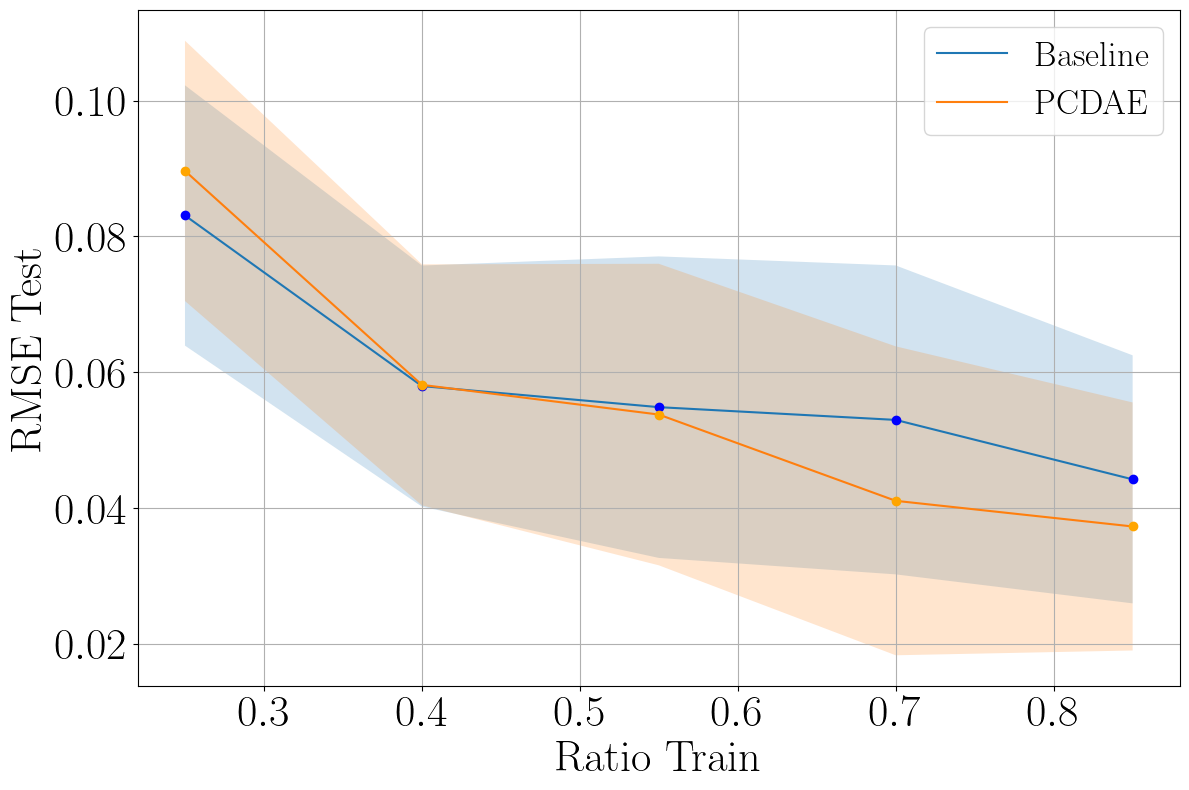

In [11]:

fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'

plt.plot(ratio_train_plot, mean_proj_plot, label="Baseline")
plt.plot(ratio_train_plot, mean_proj_plot, 'o', color="blue")
plt.fill_between(ratio_train_plot,
                    mean_proj_plot - std_proj_plot,
                    mean_proj_plot + std_proj_plot,
                    alpha=0.2)


plt.plot(ratio_train_plot, mean_pcdae_plot, label="PCDAE")
plt.plot(ratio_train_plot, mean_pcdae_plot, 'o', color="orange")
plt.fill_between(ratio_train_plot,
                    mean_pcdae_plot - std_pcdae_plot,
                    mean_pcdae_plot + std_pcdae_plot,
                    alpha=0.2)

# plt.plot(parameters_pcdae, rmse2_mean_pcdae, label="PCDAE")
# plt.plot(parameters_pcdae, rmse2_mean_pcdae, 'o', color="orange")
# plt.fill_between(parameters_pcdae,
#                     rmse2_mean_pcdae - rmse2_std_pcdae,
#                     rmse2_mean_pcdae + rmse2_std_pcdae,
#                     alpha=0.2)


plt.xlabel(r'Ratio Train', fontsize=32)
plt.ylabel(r'RMSE Test', fontsize=32)
# plt.ylabel(r'$T/\Lambda$', fontsize=32)
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)
plt.legend(fontsize=25)
# plt.ylim(0.005, 0.09)
plt.tight_layout()
plt.grid()
plt.savefig("PCDAE_Baseline_training_scaling.png")

In [8]:
### less params to see 
### more iteatiosn in the baseline

In [9]:
print(config)

{'model_name': 'Regressor', 'data': {'data_path': 'data/data_3000_points.txt'}, 'training': {'ratio_test_val_train': 0.15, 'batch_size': 32, 'lr': '5e-4', 'n_epochs_max': 1500, 'n_epochs_min': 1000, 'weights_physics': 0.005}, 'model': {'x_dim': 3, 'y_dim': 17, 'hidden_size': [95, 95]}}


In [10]:
with h5py.File("scaling_pcdae.h5", "r") as f:
    
    seed_vec_pcdae = f['results/seed'][:]
    hidden_vec_pcdae = f['results/hidden'][:]
    loss_init_pcdae = f['results/loss_init'][:]
    loss_refine1_pcdae = f['results/loss_refine1'][:]
    loss_refine2_pcdae = f['results/loss_refine2'][:]
    pickled_config = f['results/config'][()]

config_pcdae = pickle.loads(pickled_config)

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'scaling_pcdae.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
print(np.sqrt(loss_refine1_pcdae))
print(np.sqrt(loss_refine2_pcdae))

[0.01472293 0.02556084 0.01907545 0.02687382]
[0.01370951 0.01986483 0.01652364 0.01428509]
